# Contour Mapping


#### What is contour mapping?
Contour mapping is a two dimension way to graph that uses x and y values to plot colors or lines with the respective z coordinates. The standard use is for the x and y values to be coordinates and the z value as the altitude or relative altitiude for that point. 

#### Why is this useful?
Contour Mapping is a great way to visualize data, that can easily be accomplished using Python.

Contour mapping is used frequently for hiking so there is a large amount of data available.
It is also commonly used in math courses as a way to represent data and figures.

In [362]:
# Don't change this cell; just run it. 
from client.api.notebook import Notebook
ok = Notebook('Contour-Mapping.ok')
ok.auth(inline=True)

## Using matplots: (Simple)
Matplots is an easy way to implement contour mapping, and you may be already familiar with some of the methods.

##### Imports:
As always we will start with our matplot improts, in the first example we will make a mathmatical contour map, so we will import numpy to help with that graph.

In [80]:
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

#### Here is a simple example:
Let's say we have a function: x^3+ (y+1)^3 = z.

To do this we will need a grid of values for our x&y, which is when the numpy method "meshgrid" comes in handy.

In [4]:
u = np.linspace(-1,1,100)
x, y = np.meshgrid(u, u)

Now that we have these values, we can plug in to find the values for z.
The first thing we will need is the figure, on the bottom axis we will have the x points, and on the vertical axis the y points.
Now that we have this figure, we can make the figure contoured, and finally display it.

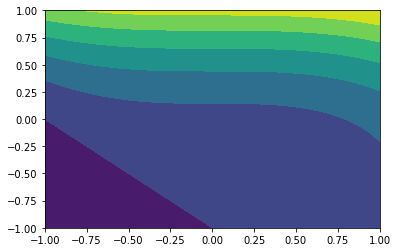

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
z = x**3 + (y+1)**3
ax.contourf(x,y,z)
plt.show()

## Using Plotly! (Simple)
##### If you have not covered plotly, do not do this section!

Another great feature of plotly that we did not cover during the brief plotly introduction set is the contour plots.

This will be a brief walkthrough of how to make a plotly contour plot, beginning with the import statements.

In [268]:
import plotly.graph_objects as go

The standard contour in Plotly uses a 2D array of "altitiudes" and their positions in the array are their "x and y coordinate." This map is then smoothed based on what looks natural.

##### The following example is taken directly from the plotly website:

In [269]:
fig = go.Figure(data =
    go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]]
    ))
fig.show()

## Using real data: (Warmup)
A more practical and challenging way to use contour maps is from real data. While this is not the only way to do it, this is a straightforward way to collect data that is quite interesting!


###### Finding Data:
Unfortunately it is extremely difficult to find elevation data, since it is so valuable. 
Despite this, you can actually use Google Earth Pro to obtain location data in a path, then export this data as a KML file.

###### Adding the elevations
This exported data will not contain the elevations. Have no fear! Take the KML and upload then redownload the file via this website:
https://www.gpsvisualizer.com/elevation
It will add the apropriate elevation data based on national information.

###### Transfering to CSV and Plot
Then, with this KML file, use a TCX converter to make this file into a CSV.

With this csv your file should have a column of x,y coordinates and the relative elevation (z), as well as some extra information.

Finally, plot this data.
##### An unfortunate twist:
Since there is so much data, it can take a long time to run these converters, so "paths" work much bettern than "polygons."
For this reason, we will go over an example of a path in the warmup, then go over how we can still make this work.

##### For the sake of visualization, here is what the path looks like that we'll be plotting.

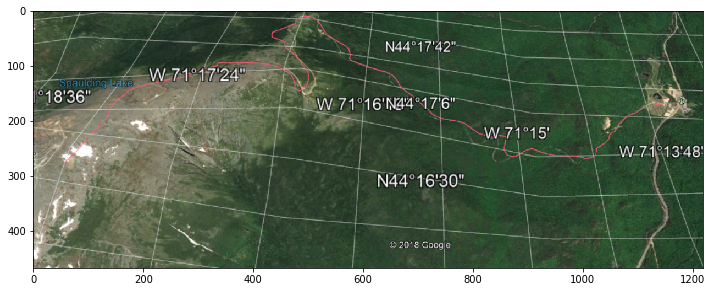

In [304]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(12,12))
plt.imshow(mpimg.imread('Washington-ActualPath.png'))

We will begin by importing the dataset for this path, and looking at the data.

In [307]:
import pandas as pd
df = pd.read_csv("Washington-Path-ele.csv", header = 0)
df.head()

,UNIX TIME;TIME;LAT,LAT;LONG,LONG;ALT,ALT;DIST;HR;CAD;TEMP;POWER
0,1179727200;2007-05-21T06:00:00Z;44,270495;-71,299990;1827,117;0;0;0;No Data;No Data
1,1179727231;2007-05-21T06:00:31Z;44,271233;-71,299636;1818,704;0.0869384;0;0;No Data;No Data
2,1179727302;2007-05-21T06:01:42Z;44,272884;-71,298728;1820,166;0.2845491;0;0;No Data;No Data
3,1179727354;2007-05-21T06:02:34Z;44,274075;-71,298001;1833,082;0.4292721;0;0;No Data;No Data
4,1179727404;2007-05-21T06:03:24Z;44,275254;-71,297435;1825,133;0.5680647;0;0;No Data;No Data


Looking at this data you can see some issues with how it's formatted. As a challenge problem, fix this data set and then plot it.

Our goal is to have a plot that shows the elevation as we go down the mountain. 
Hint: if we're on a path does our x-y coordinate matter?

###### Q1:
Do we need a 3d graph for this task? Adjust the variable to the correct answer.

In [363]:
resp = "y/n"
resp = "n"
_ = ok.grade('q01')

##### Q2:
What of the original variables do we need?
Hint: While there are two potential options for the first variable, much one is easier to access and use. (so say that!)

In [338]:
our_vars = ["VAR1","VAR2","VAR3", "etc..."]
our_vars = ["UNIX TIME", "ALT"]
_ = ok.grade('q02')

True

###### Q3:
Make a new dataframe "plotdf" with ONLY the data that we need.
Hint: This can be done using the string split method.

In [364]:
df['time'], df['junk'] = df['UNIX TIME;TIME;LAT'].str.split(';', 1).str
df['long'], df['elevation'] = df['LONG;ALT'].str.split(';', 2).str
df['lat'],df['bigLong'] = df['LAT;LONG'].str.split(';',1).str
plotdf = pd.DataFrame(df,columns=('elevation','time'))
_ = ok.grade('q03')

Now that we have the apropriate data we can plot it.

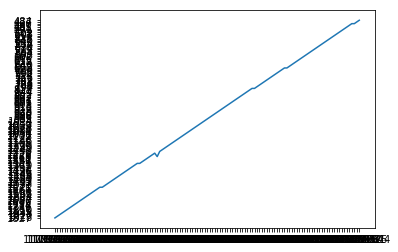

In [314]:
plt.plot(plotdf['time'],plotdf['elevation'])

## Using real data: (Advanced)
Now that we know how to get a line of elevation data, we can use this to aproximately measure elevations. We will be do this by taking a bunch of lines to get elevation data for all of those points!

For your sake, this is what the original spot looks like.

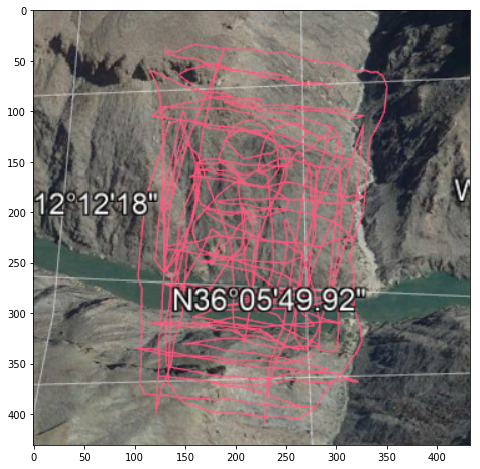

In [316]:
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(mpimg.imread('CanyonPic.png'))

Now let's import the data and get started! The data is a bit more cleaned up this time, so things should be easier.

In [317]:
canyon = pd.read_csv("closecanyon.csv", header = 0)
canyon.head()

,ele,_lat,_lon
0,809.766,36.099211,-112.202812
1,803.924,36.099074,-112.202825
2,791.291,36.098832,-112.202854
3,770.409,36.098508,-112.202892
4,745.982,36.098206,-112.202921



##### Q4:
Yep, that looks good! Now, we need to use the tricontour methods. To use these we need to have our data as three separate column vectors, let's call them them "a" "b" and "c"

These can each be made in one line, directly from the canyon dataframe.

In [322]:
a = canyon['_lat']
b = canyon['_lon']
c = canyon['ele'] 
_ = ok.grade('q04')

Now, we will make the tricontour plots on two separate axis, so that we can see some of the options we can explore on each one.

The first will have filled in contour lines with the points on top. We will also add a title and the colorbar, so that the elvation (meters) can be read.

On the second, we will just plot the tricontour 

Text(0.5, 1.0, 'Tricontour w/o colorbar')

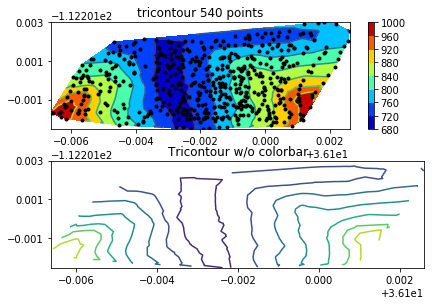

In [327]:
fig, (ax1,ax2) = plt.subplots(nrows = 2)
fig.tight_layout()

ax1.tricontour(a,b,c)
cntr1 = ax1.tricontourf(a,b,c,cmap = 'jet')
fig.colorbar(cntr1,ax=ax1)
ax1.plot(a,b,'ko',ms=3)
ax1.set_title('tricontour 540 points')

ax2.tricontour(a,b,c)
ax2.set_title('Tricontour w/o colorbar')

###### Color maps:
You may have used colormaps before, but they're a built in package that contains color spreads. In this example we used 'jet,' but there is a huge list of them, or you can make your own. If you'd like to read more about colormaps you can go here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html